# MIDS Statistics Lab 3

## Goal:
#### Goal is to help campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government. 

In [15]:
library(reshape2)
library(ggplot2)

In [16]:
crime<-read.csv("crime_v2.csv", stringsAsFactors = FALSE)

In [17]:
nrow(crime)
tail(crime)

[1] 97

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


There are 6 rows of data that are completely null. These rows will be omitted. 

In [18]:
crime<-na.omit(crime)
nrow(crime)

[1] 91

In [19]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

In [20]:
length(unique(crime$county))

[1] 90

In [21]:
print(crime[duplicated(crime$county),"county"])

print(subset(crime, county==193))

[1] 193
   county year    crmrte   prbarr  prbconv  prbpris avgsen      polpc   density
88    193   87 0.0235277 0.266055 0.588859 0.423423   5.86 0.00117887 0.8138298
89    193   87 0.0235277 0.266055 0.588859 0.423423   5.86 0.00117887 0.8138298
      taxpc west central urban pctmin80     wcon     wtuc     wtrd     wfir
88 28.51783    1       0     0  5.93109 285.8289 480.1948 268.3836 365.0196
89 28.51783    1       0     0  5.93109 285.8289 480.1948 268.3836 365.0196
       wser   wmfg   wfed   wsta   wloc       mix    pctymle
88 295.9352 295.63 468.26 337.88 348.74 0.1105016 0.07819394
89 295.9352 295.63 468.26 337.88 348.74 0.1105016 0.07819394


There is a duplicate value for county 193. All values for that county are the same. The duplicate version of 193 should be excluded. 

In [22]:
crime <- crime[!duplicated(crime),]
nrow(crime)

[1] 90

No id variables; using all as measure variables


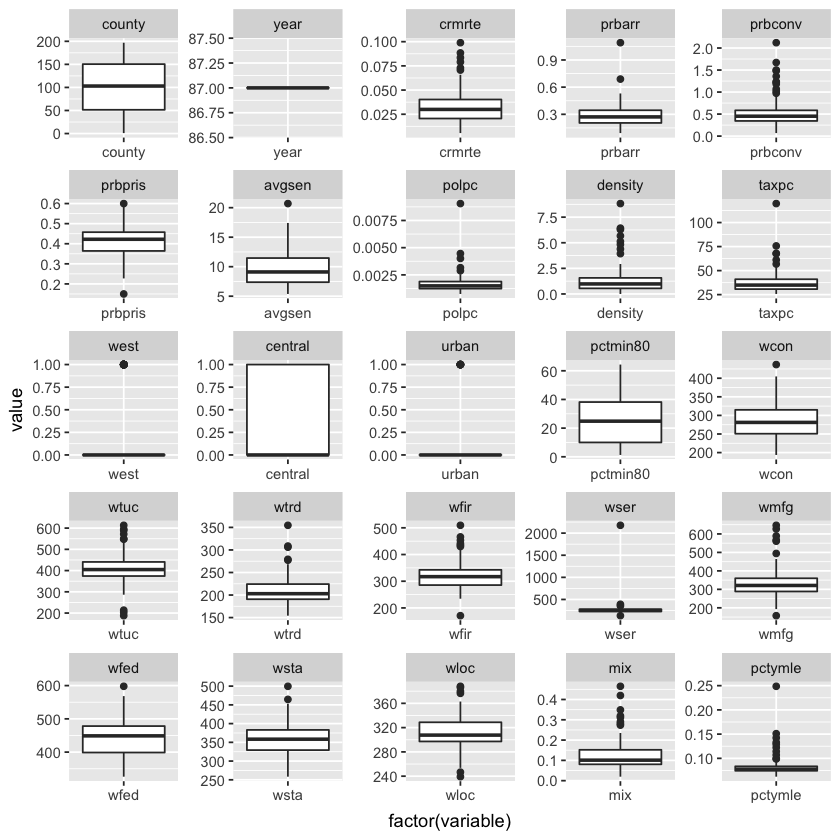

In [23]:
meltData<-melt(crime)

p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + facet_wrap(~variable, scale="free")


Reviewing the boxplot some variables have outliers that should be investigated. These include urban, west, and wser. 

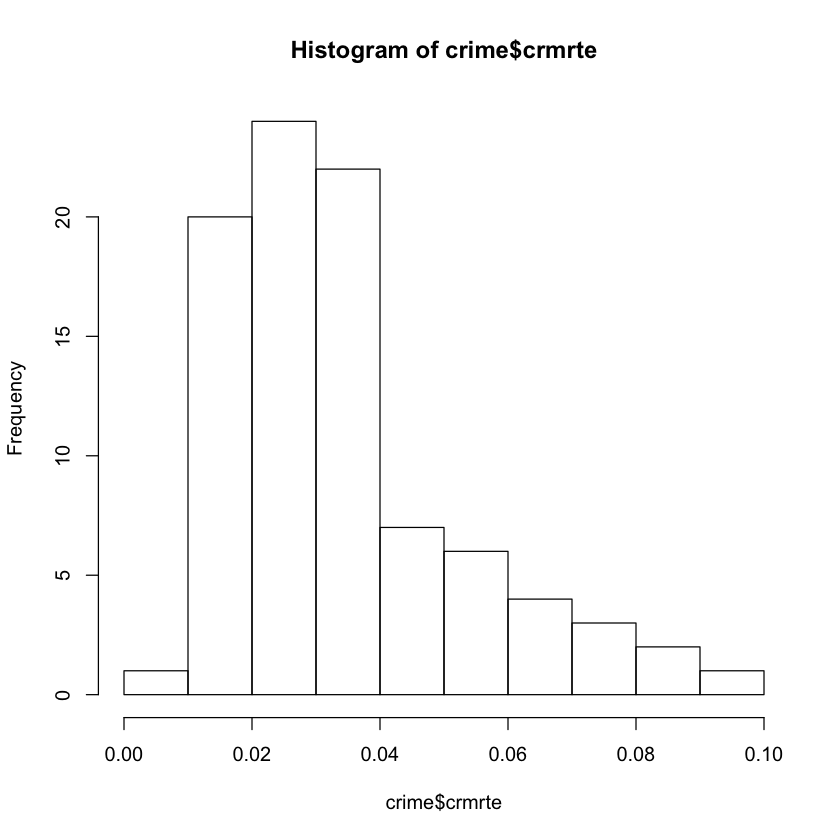

In [24]:
hist(crime$crmrte)

## Hypothesis Testing

The assumption is the crime rate is driven by a variety of factors. There are numerous Hypotheses that could be proposed for potential variables that affect the crime rate. For example, it could be proposed that the police per capita affect the crime rate. More police leads to more people being caught by the police, which drives up the crime rate. Any alternative analysis could state that more police leads to less people committing crimes due to the prevalance of the police. 

Another hypothesis could be that crime rate changes based on the probability of arrest, probability of convinction, and probability of prison sentence. This model could be described as criminals as rational actors models. It's based on the assumption that people that commit crimes weigh the pros and cons before committing the crime. That includes factoring the likelihood of getting caught and being sentenced. 

### Keith's proposed hypothesis

For this report we're working with some basic assumptions to drive our primary hypothesis tests. These include that  regions with more people, density, regions with lower income, taxpc, and regions with more young males have higher crime rates, pctymle. Taxpc is the tax revenue per capita. This variable is being used as a proxy for income since an income statistic isn't available. There could be reasons beyond income that tax revenue varies. For example, urban areas typically have high tax liabilities than rural areas. In general though it would be expected that higher  income areas have more tax revenue per capita.   

Our first model will be developed with these variables to measure the impact on crime rates. We'll follow up model one by adding additional variables to see if we can increase the fit of the model. 

The third model will contain all the variables provided in the dataset. This model will be used to compare the fit to model 1 and model 2. 


## Correlations

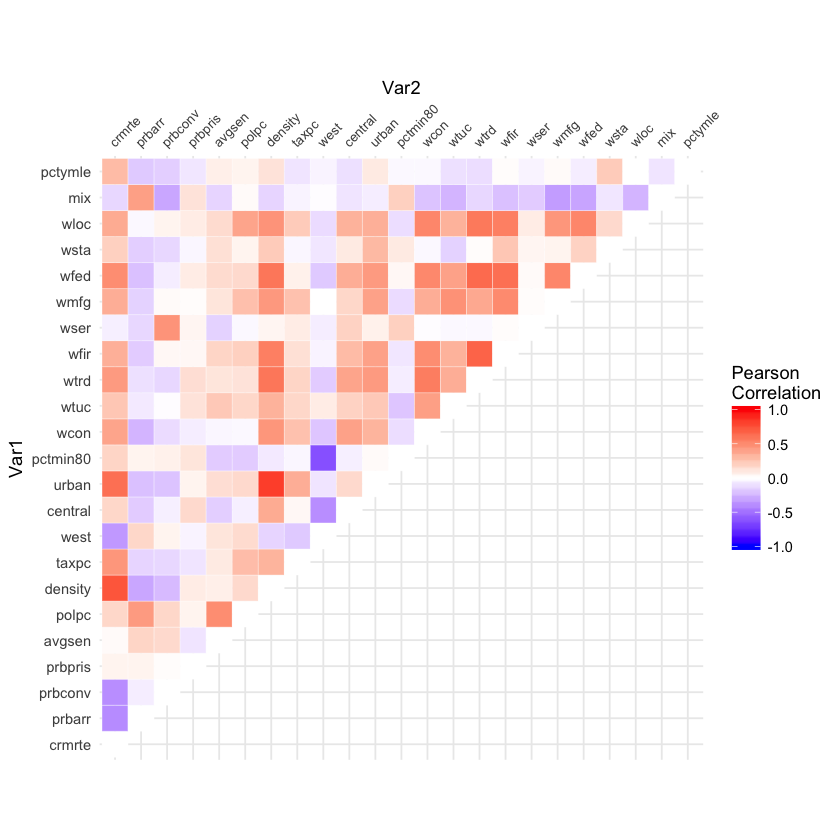

In [25]:

crime2 <- subset( crime, select = -c(year, county) )

cor_crime <- round(cor(crime2),2)

get_lower_tri<-function(cor_crime){
    cor_crime[upper.tri(cor_crime)] <- NA
    return(cor_crime)
  }

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cor_crime){
    cor_crime[lower.tri(cor_crime)]<- NA
    return(cor_crime)
  }
  

lower_tri <- get_lower_tri(cor_crime)
# Melt the correlation matrix
melted_cormat <- melt(lower_tri, na.rm = TRUE)

melted_cormat[melted_cormat$value == 1,]$value <- 0

# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  scale_x_discrete(position = "top") +
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 8, hjust = 0))+
 coord_fixed()
# Print the heatmap
print(ggheatmap)

In [26]:
print(cor_crime)

         crmrte prbarr prbconv prbpris avgsen polpc density taxpc  west central
crmrte     1.00  -0.40   -0.39    0.05   0.02  0.17    0.73  0.45 -0.35    0.17
prbarr    -0.40   1.00   -0.06    0.05   0.18  0.43   -0.30 -0.14  0.17   -0.17
prbconv   -0.39  -0.06    1.00    0.01   0.16  0.17   -0.23 -0.13  0.05   -0.05
prbpris    0.05   0.05    0.01    1.00  -0.09  0.05    0.08 -0.09 -0.04    0.16
avgsen     0.02   0.18    0.16   -0.09   1.00  0.49    0.07  0.09  0.11   -0.16
polpc      0.17   0.43    0.17    0.05   0.49  1.00    0.16  0.28  0.15   -0.05
density    0.73  -0.30   -0.23    0.08   0.07  0.16    1.00  0.32 -0.14    0.36
taxpc      0.45  -0.14   -0.13   -0.09   0.09  0.28    0.32  1.00 -0.18    0.03
west      -0.35   0.17    0.05   -0.04   0.11  0.15   -0.14 -0.18  1.00   -0.39
central    0.17  -0.17   -0.05    0.16  -0.16 -0.05    0.36  0.03 -0.39    1.00
urban      0.62  -0.21   -0.20    0.05   0.14  0.16    0.82  0.35 -0.09    0.16
pctmin80   0.18   0.05    0.06    0.11  

### Notes on correlations

- Urban and density appear to be strongly colinear, which makes sense. 
- Crime rate has the strongest positive correlation with density & urban followed by wfed, taxpc, and wtrd. Crime rate the strongest negative correlation with prbarr, prbconv, and west. West has one significant outlier, which might be impacting its correlation. 
- There appears to be colinearity with many of the wage variables. Mix and the wage variables appear to have an inverse relationship. 

## Omitted Variables

#### Drugs and Alcohol abuse: 
It would be expected that drug and alcohol abuse would have a significant impact on an area. There is no proxy variable available in the dataset. 

#### Income levels: 
The dataset contains multiple variables about wages and tax revenue. However it doesn't include information about the income of residents of a region. As mentioned in the hypothesis testing section, the model leverages tax revenue per capita. There are proxy variables available in the dataset, but they contain limitations. For example, the wage metrics don't provide information on how many people are in each group. So it could be one person is in a high wage group. There is no way to leverage those to calculate income of a group. 

#### Unemployment rate: 
Unemployment may be associated with crime. There are not proxy variables available. 

#### Education levels: 
Both the education level of the person that committed the crime and perhaps the family members of the person could have an affect. 

#### Likelihood to have a lawyer: 
Some regions may have individuals that are more likely to be able to hire their own lawyers rather than relating on public defendants. It may be these people are less likely to be charged with a crime for the same act. 

#### Recidivism: 
Recidivism could have an impact on crime rates. If one area is doing a better job of lower recidivism compared to other regions that could reduce crime rates in that region. 

#### Racism / race base policing: 
As we've seen in the news recently, there are times when minorities are more likely to be confronted by policy. The dataste contains a variable on percent minority, but there could be impacts based on the makeup of the police force and policies of the police and judical system. Given the history of crime and the criminal justice system it would be unwise to consider policies to reduce crime without evalauting this point in greater detail than the data in this dataset allows. 

